In [1]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
# ~.py

# Version: 2018.11.29.01

# Requiered libraries
import sys, os, math, time
import numpy as np
import scipy.linalg as cp
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [2]:
def crank_nicolson(alpha,u,N,T):
    N = N+1
    aux = np.zeros(N)
    aux[0] = 1.+alpha
    aux[1] = -alpha/2
    A = cp.toeplitz(aux)
    A[0] = A[-1]= 0
    A[0,0] = A[-1,-1] = 1
    A = cp.inv(A, overwrite_a=True, check_finite=True)
    for t in range(1,T):
        forward_step(alpha/2,u[t],u[t-1],N)
        u[t] = A@u[t]
    return(u)

def forward_step(alpha,u,uPrev,N):
    betta = 1.-2.*alpha
    for x in range(1,N-1): #loop from i=1 to i=N
        u[x] = alpha*uPrev[x-1] + betta*uPrev[x] + alpha*uPrev[x+1]

In [3]:
N = 10
dt = 5e-3
T = 400

u = np.zeros((T,N+1), np.double)
(x,dx) = np.linspace(0,1,N+1, retstep=True)
alpha = dt/dx**2
u[0,0] = 0.
u[:,-1] = 1.
print("alpha =\n",alpha)
print("x =\n",x)
print("u[0] =\n",u[0,:])

alpha =
 0.4999999999999999
x =
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
u[0] =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [4]:
t0 = time.time()
sol = crank_nicolson(alpha,u,N,T)
t1 = time.time()
print(t1-t0)
print("Explicit0 =\n",sol[0,:])
print("Explicit1 =\n",sol[1,:])
print("Explicitn =\n",sol[-1,:])

0.03935050964355469
Explicit0 =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Explicit1 =
 [0.00000000e+00 2.50087093e-07 1.50052256e-06 8.75304825e-06
 5.10177669e-05 2.97353553e-04 1.73310355e-03 1.01012678e-02
 5.88745030e-02 3.43145751e-01 1.00000000e+00]
Explicitn =
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


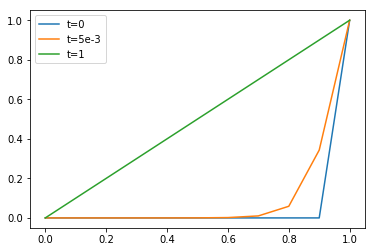

In [5]:
#%matplotlib qt
plt.plot(x,sol[0,:], '-', label = "t=0")
plt.plot(x,sol[1,:], '-', label = "t=5e-3")
plt.plot(x,sol[-1,:], '-', label = "t=1")
plt.legend(loc='best')
plt.show()

In [6]:
print(sol[0])
print(sol[1])
print(sol[-1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.00000000e+00 2.50087093e-07 1.50052256e-06 8.75304825e-06
 5.10177669e-05 2.97353553e-04 1.73310355e-03 1.01012678e-02
 5.88745030e-02 3.43145751e-01 1.00000000e+00]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
